## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
#import tensorflow as tf 

#if tf.test.gpu_device_name(): 
    

   # print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

#else:

   # print("Please install GPU version of TF")

Please install GPU version of TF


In [2]:
#tf.test.gpu_device_name()

''

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:/catsdogs/catdogs/training_set'
valid_path = 'D:/catsdogs/catdogs/test_set'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob(r'D:\catsdogs\catdogs\training_set\*')

In [26]:
print(len(folders))

2


In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/catsdogs/catdogs/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8000 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory(r'D:\catsdogs\catdogs\test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\jitesh\anaconda3\envs\dogs\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
250/250 [==============================] - 1026s 4s/step - loss: 0.4995 - accuracy: 0.7989 - val_loss: 0.2170 - val_accuracy: 0.9090
Epoch 2/30
250/250 [==============================] - 992s 4s/step - loss: 0.2165 - accuracy: 0.9123 - val_loss: 0.1939 - val_accuracy: 0.9205
Epoch 3/30
250/250 [==============================] - 991s 4s/step - loss: 0.1742 - accuracy: 0.9328 - val_loss: 0.1911 - val_accuracy: 0.9280
Epoch 4/30
250/250 [==============================] - 995s 4s/step - loss: 0.1517 - accuracy: 0.9390 - val_loss: 0.2551 - val_accuracy: 0.9070
Epoch 5/30
250/250 [==============================] - 992s 4s/step - loss: 0.1440 - accuracy: 0.9446 - val_loss: 0.2160 - val_accuracy: 0.9270
Epoch 6/30
250/250 [==============================] - 994s 4s/step - loss: 0.1314 - accuracy: 0.9463 - val_loss: 0.1944 - val_accuracy: 0.9345
Epoch 7/30
250/250 [==============================] - 992s 4s/step - loss: 0.1497 - accuracy: 0.9391 - val_loss: 0.3578 - val_accuracy: 0.891

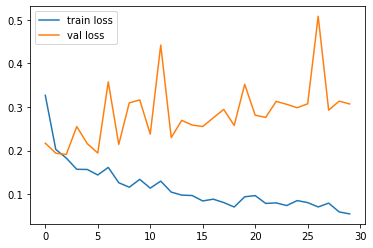

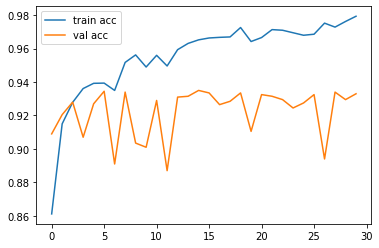

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')